In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

url = '/content/datos/datos_paises.csv'
df = pd.read_csv(url, sep=";")
print(df)

    alpha_2 alpha_3       area  ... postal_code_format postal_code_regex  tld
0        AD     AND      468.0  ...              AD###  ^(?:AD)*(\d{3})$  .ad
1        AE     ARE    82880.0  ...                NaN               NaN  .ae
2        AF     AFG   647500.0  ...                NaN               NaN  .af
3        AG     ATG      443.0  ...                NaN               NaN  .ag
4        AI     AIA      102.0  ...                NaN               NaN  .ai
..      ...     ...        ...  ...                ...               ...  ...
247      ZA     ZAF  1219912.0  ...               ####         ^(\d{4})$  .za
248      ZM     ZMB   752614.0  ...              #####         ^(\d{5})$  .zm
249      ZW     ZWE   390580.0  ...                NaN               NaN  .zw
250      CS     SCG   102350.0  ...              #####         ^(\d{5})$  .cs
251      AN     ANT      960.0  ...                NaN               NaN  .an

[252 rows x 19 columns]


In [6]:
print('Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)


Cantidad de Filas y columnas: (252, 19)
Nombre columnas: Index(['alpha_2', 'alpha_3', 'area', 'capital', 'continent', 'currency_code',
       'currency_name', 'eqivalent_fips_code', 'fips', 'geoname_id',
       'languages', 'name', 'neighbours', 'numeric', 'phone', 'population',
       'postal_code_format', 'postal_code_regex', 'tld'],
      dtype='object')


In [7]:
df.describe()

,area,geoname_id,numeric,population
count,2.520000e+02,2.520000e+02,252.000000,2.520000e+02
mean,5.952879e+05,2.427870e+06,434.309524,2.727679e+07
std,1.904818e+06,1.632093e+06,254.663139,1.164127e+08
min,0.000000e+00,4.951800e+04,0.000000,0.000000e+00
25%,1.098000e+03,1.163774e+06,217.000000,1.879528e+05
50%,6.489450e+04,2.367967e+06,436.000000,4.268583e+06
75%,3.622245e+05,3.478296e+06,652.500000,1.536688e+07
max,1.710000e+07,8.505033e+06,894.000000,1.330044e+09


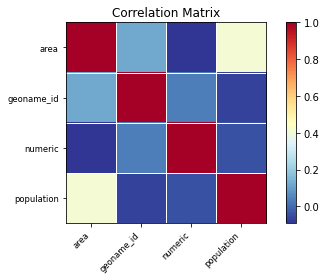

In [8]:
corr = df.set_index('alpha_3').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

     country  year  population
444  Ecuador  1952     3548753
445  Ecuador  1957     4058385
446  Ecuador  1962     4681707
447  Ecuador  1967     5432424
448  Ecuador  1972     6298651


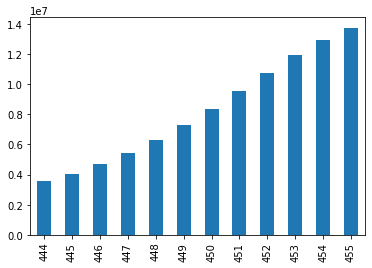

In [28]:
url = '/content/datos/paises.csv'
df_pop = pd.read_csv(url)
df_pop_ec = df_pop[df_pop["country"] == 'Ecuador' ]
print(df_pop_ec.head())
df_pop_ec.drop(['country'],axis=1)['population'].plot(kind='bar')


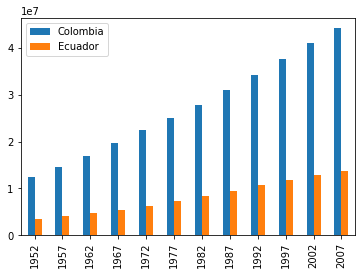

In [29]:
df_pop_col = df_pop[(df_pop["country"] == 'Colombia')]
anios = df_pop_ec['year'].unique()
pop_col = df_pop_col['population'].values
pop_ec = df_pop_ec['population'].values

df_plot = pd.DataFrame({'Colombia': pop_col,
                    'Ecuador': pop_ec}, 
                       index=anios)
df_plot.plot(kind='bar')

In [11]:
df_espanol = df.replace(np.nan, '', regex=True)
df_espanol = df_espanol[ df_espanol['languages'].str.contains('es') ]
df_espanol

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
13,AW,ABW,193.0,Oranjestad,,AWG,Guilder,,AA,3577279,"nl-AW,es,en",Aruba,,533,297,71566,,,.aw
28,BO,BOL,1098580.0,Sucre,SA,BOB,Boliviano,,BL,3923057,"es-BO,qu,ay",Bolivia,"PE,CL,PY,BR,AR",68,591,9947418,,,.bo
30,BR,BRA,8511965.0,Brasilia,SA,BRL,Real,,BR,3469034,"pt-BR,es,en,fr",Brazil,"SR,PE,BO,UY,GY,PY,GF,VE,CO,AR",76,55,201103330,#####-###,^\d{5}-\d{3}$,.br
36,BZ,BLZ,22966.0,Belmopan,,BZD,Dollar,,BH,3582678,"en-BZ,es",Belize,"GT,MX",84,501,314522,,,.bz
45,CL,CHL,756950.0,Santiago,SA,CLP,Peso,,CI,3895114,es-CL,Chile,"PE,BO,AR",152,56,16746491,#######,^(\d{7})$,.cl
48,CO,COL,1138910.0,Bogota,SA,COP,Peso,,CO,3686110,es-CO,Colombia,"EC,PE,PA,BR,VE",170,57,47790000,,,.co
49,CR,CRI,51100.0,San Jose,,CRC,Colon,,CS,3624060,"es-CR,en",Costa Rica,"PA,NI",188,506,4516220,####,^(\d{4})$,.cr
50,CU,CUB,110860.0,Havana,,CUP,Peso,,CU,3562981,es-CU,Cuba,US,192,53,11423000,CP #####,^(?:CP)*(\d{5})$,.cu
60,DO,DOM,48730.0,Santo Domingo,,DOP,Peso,,DR,3508796,es-DO,Dominican Republic,HT,214,+1-809 and 1-829,9823821,#####,^(\d{5})$,.do


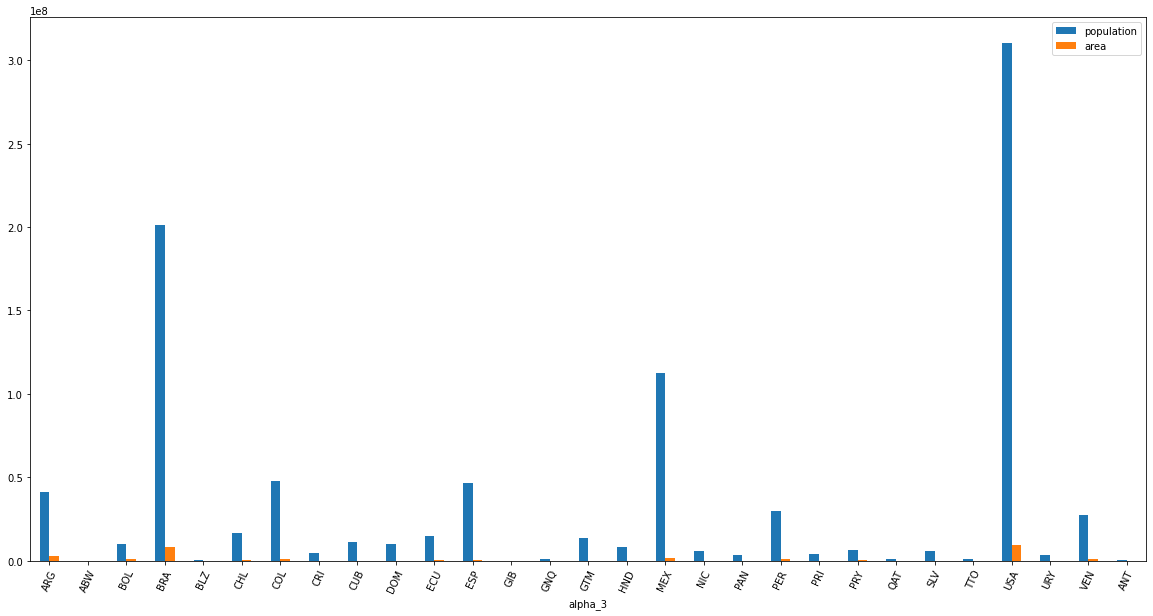

In [12]:
df_espanol.set_index('alpha_3')[['population','area']].plot(kind='bar',rot=65,figsize=(20,10))

In [14]:
anomalies = []

# Funcion ejemplo para detección de outliers
def find_anomalies(data):
    # Set upper and lower limit to 2 standard deviation
    data_std = data.std()
    data_mean = data.mean()
    anomaly_cut_off = data_std * 2
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    print(lower_limit.iloc[0])
    print(upper_limit.iloc[0])

    # Generate outliers
    for index, row in data.iterrows():
        outlier = row # # obtener primer columna
        # print(outlier)
        if (outlier.iloc[0] > upper_limit.iloc[0]) or (outlier.iloc[0] < lower_limit.iloc[0]):
            anomalies.append(index)
    return anomalies

find_anomalies(df_espanol.set_index('alpha_3')[['population']])

-102872707.87855022
167589161.25786057


['BRA', 'USA']

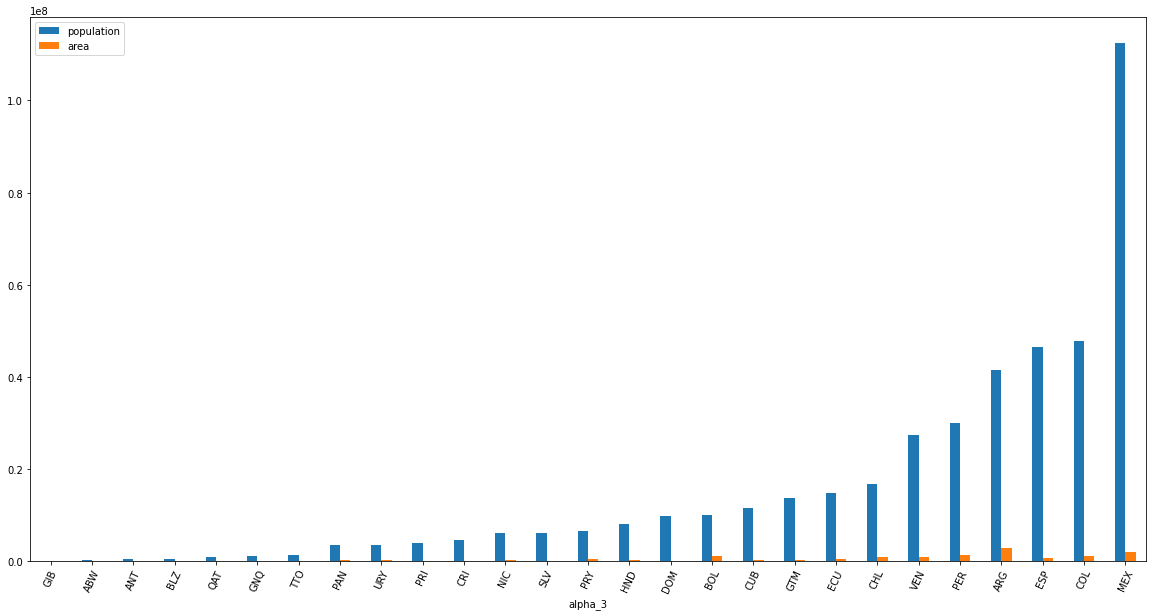

In [15]:
df_espanol.drop([30,233], inplace=True)
df_espanol.set_index('alpha_3')[['population','area']].sort_values(["population"]).plot(kind='bar',rot=65,figsize=(20,10))